In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import os

# Run code for multiple Targets

In [3]:
from pyGRBz.pyGRBz import GRB_photoZ

In [4]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/Tuto/MultipleTargets/',
    thres_err=0.02, # if flux_err/flux < thres_err then set flux_err = thres_err*flux
    wvl_step=50, # angstroms
    wvl_step_X=10 # angstroms
)

In [5]:
# Load as many targets as you want. It can be a mix of SEDs and light curves
photoz.load_data(
    data_dir='/data/sed/',           
    data_name=['GRB050904','GRB120922A']
)

            #data_name=['GRB050904','GRB080825B','GRB080906','GRB080913','GRB080916C','GRB081228','GRB090423',
            #           'GRB090429B','GRB090516','GRB100518A','GRB110721A','GRB120712A','GRB120922A','GRB130215A',
            #           'GRB130327A','GRB130408A','GRB130514A','GRB130606A','GRB130907A','GRB130925A','GRB131117A',
            #           'GRB140419A','GRB140515A','GRB140518A','GRB140614A','GRB141109A','GRB150120B','GRB150910A',
            #           'GRB151027B','GRB160203A','GRB160327A','GRB160625B'])
            


Observations:
    Name    time_since_burst band  flux ... flux_unit detection telescope ABcorr
---------- ---------------- ---- ----- ... --------- --------- --------- ------
 GRB050904            1.155   Ks 19.26 ...        AB         1     isaac     --
 GRB050904            1.155    H 19.74 ...        AB         1     isaac     --
 GRB050904            1.155    J 20.14 ...        AB         1     isaac     --
 GRB050904            1.155    z 21.03 ...        AB         1     fors2     --
 GRB050904            1.155    I 22.27 ...        AB         1     cafos     --
 GRB050904            1.155    I  24.2 ...        AB         1     fors2     --
 GRB050904            1.155    R 24.29 ...        AB         0     cafos     --
 GRB050904            1.155    V 24.23 ...        AB         0     laica     --
GRB120922A           5400.0    g 20.53 ...        AB         1     grond  -99.0
GRB120922A           5400.0    r 19.69 ...        AB         1     grond  -99.0
GRB120922A           540

In [6]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


Reddening along the line of sight ofGRB120922A: E(B-V) = 0.128

Galactic extinction in band grond g: 0.501 AB mag
Galactic extinction in band grond r: 0.347 AB mag
Galactic extinction in band grond i: 0.259 AB mag
Galactic extinction in band grond z: 0.193 AB mag
Galactic extinction in band grond J: 0.114 AB mag
Galactic extinction in band grond H: 0.072 AB mag
Galactic extinction in band grond K: 0.046 AB mag

SEDS formatted:
    Name    time_since_burst band ...     flux_corr         flux_corr_err   
                                 ...      microJy             microJy      
---------- ---------------- ---- ... ------------------ -------------------
 GRB050904            1.155    V ... 0.7379042301291044 0.18434138332737574
 GRB050904            1.155    R ... 0.6982324040771732  0.1793175688589099
 GRB050904            1.155    I ... 0.7585775750291881 0.37381165483615203
 GRB050904            1.155    I ...  4.487453899331295  0.9535625369951598
 GRB050904            1.155    z ..

<IPython.core.display.Javascript object>


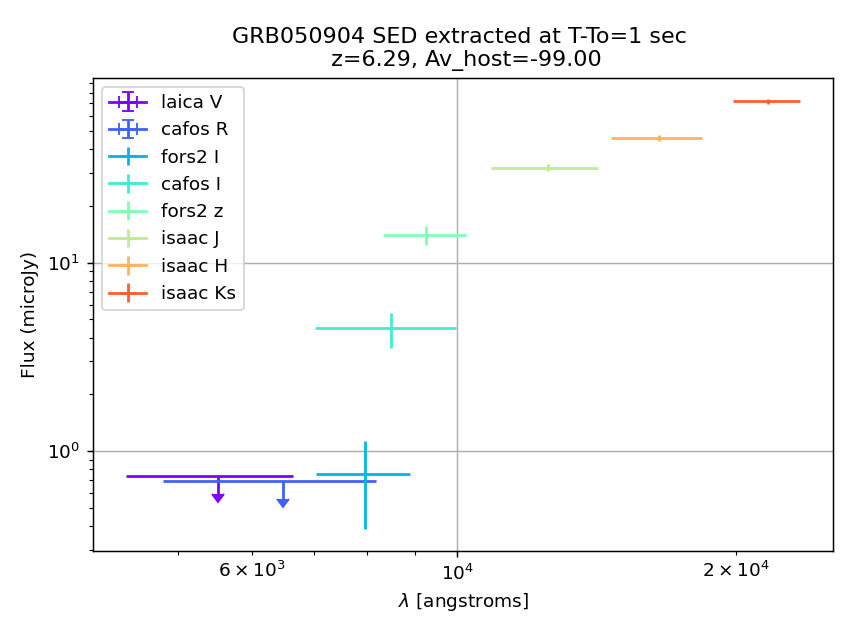

<IPython.core.display.Javascript object>


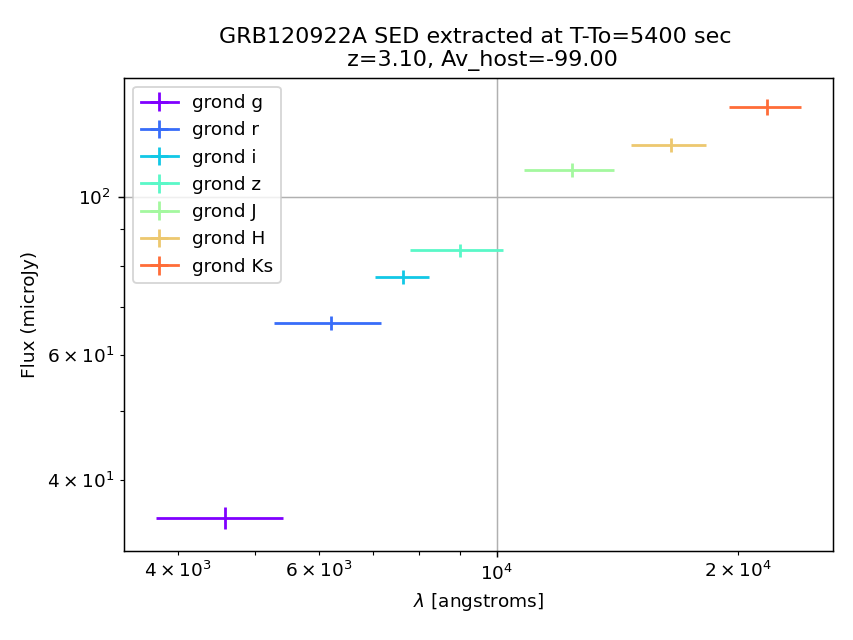


SEDS:
    Name    time_since_burst band  flux flux_err flux_unit
---------- ---------------- ---- ----- -------- ---------
 GRB050904            1.155    V 24.23     0.05        AB
 GRB050904            1.155    R 24.29     0.05        AB
 GRB050904            1.155    I  24.2      0.2        AB
 GRB050904            1.155    I 22.27     0.22        AB
 GRB050904            1.155    z 21.03     0.22        AB
 GRB050904            1.155    J 20.14     0.06        AB
 GRB050904            1.155    H 19.74     0.07        AB
 GRB050904            1.155   Ks 19.26     0.07        AB
GRB120922A           5400.0    g 20.53     0.05        AB
GRB120922A           5400.0    r 19.69     0.04        AB
GRB120922A           5400.0    i 19.44     0.04        AB
GRB120922A           5400.0    z 19.28     0.04        AB
GRB120922A           5400.0    J 18.92     0.06        AB
GRB120922A           5400.0    H 18.79     0.07        AB
GRB120922A           5400.0   Ks 18.63      0.1        AB



In [7]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [8]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0,10])



Fit 1/2 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7960 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.74.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: 6.29   Av_lit: -99.00
Running burn-in


100%|██████████| 750/750 [00:09<00:00, 82.45it/s]


Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02


100%|██████████| 1000/1000 [00:10<00:00, 94.26it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [47.34925162 70.55316485 72.40738744 71.68522062]



Autocorrelation time: 47.35 steps


Mean acceptance fraction: 0.145

Best fit:
z: 6.526  Av: 0.019  beta: 1.459  Norm: 1.044     chi2: 5.219

Mean Proba: 1.54e-02
Sum Proba: 5.41e+02

68% - 1 sigma:
z: 6.397 +0.129 -0.154
Av: 0.222 +0.169 -0.139
Beta: 0.853 +0.395 -0.481
norm: 2.088 +1.574 -0.781

95% - 2 sigma:
z: 6.397 +0.242 -0.280
Av: 0.222 +0.294 -0.209
Beta: 0.853 +0.639 -0.801
norm: 2.088 +3.288 -1.064

99% - 3 sigma:
z: 6.397 +0.351 -0.332
Av: 0.222 +0.333 -0.222
Beta: 0.853 +0.736 -0.850
norm: 2.088 +3.856 -1.151


<IPython.core.display.Javascript object>


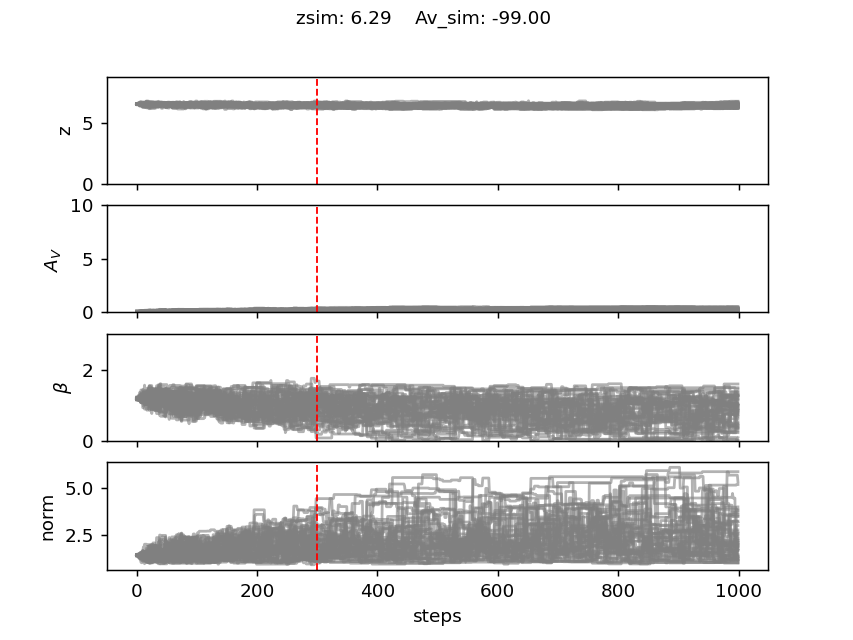

<IPython.core.display.Javascript object>


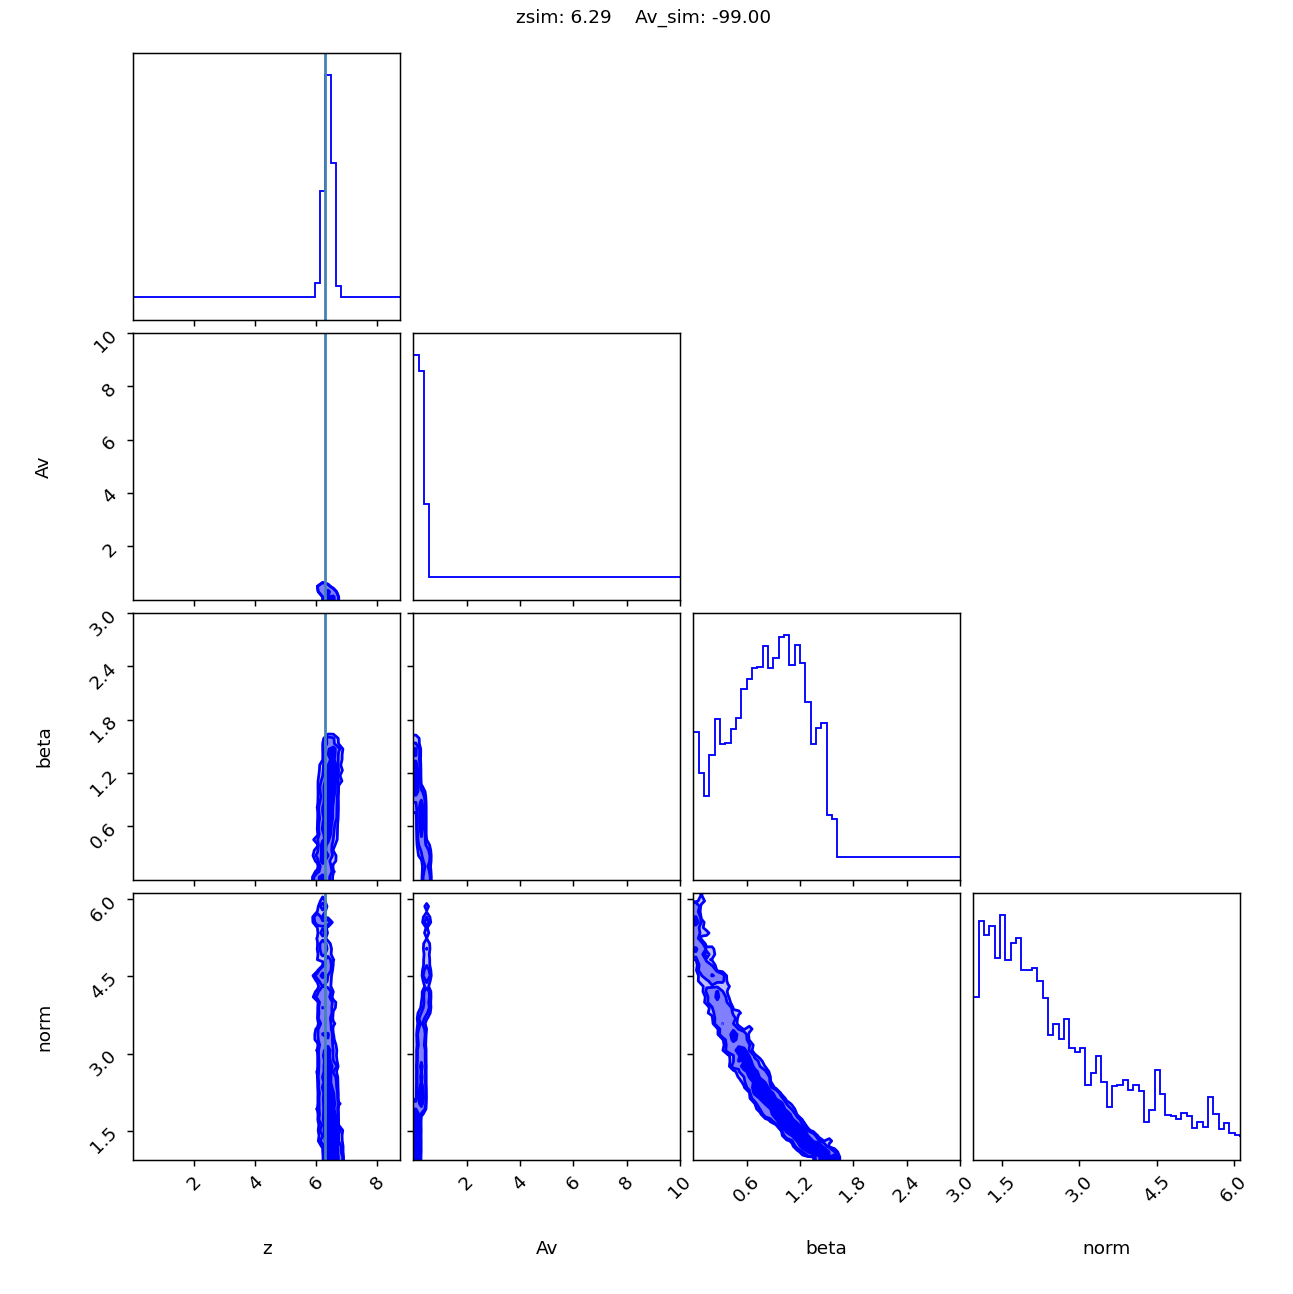


For best SED plot:
- Median values PDF: 6.397 0.222 0.853 2.088
- Best fit: 6.526 0.019 1.459 1.044


<IPython.core.display.Javascript object>


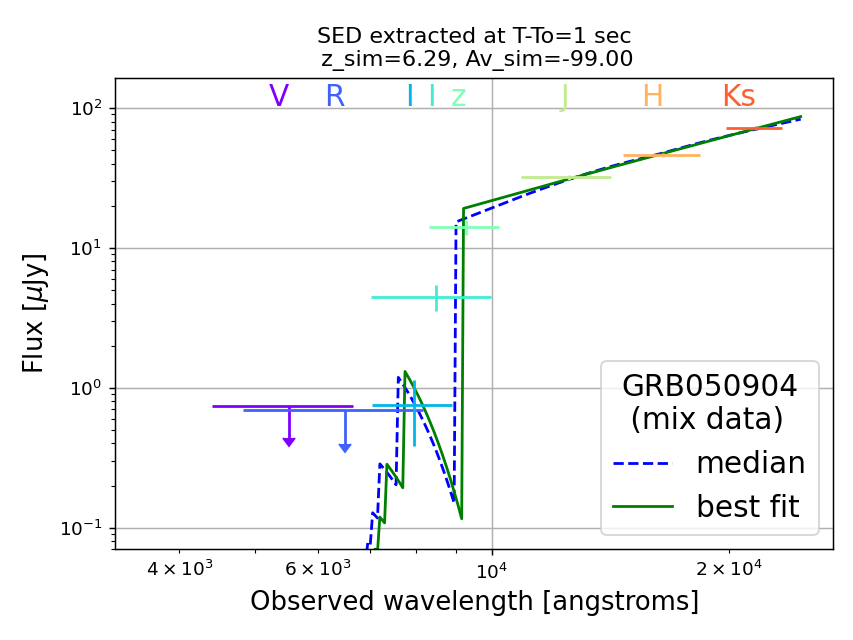



Fit 2/2 	 Object: GRB120922A 

Bluest band detection: grond/g with eff_wvl=4587 and bandwidth=1650 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 4.93.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: 3.10   Av_lit: -99.00
Running burn-in


100%|██████████| 750/750 [00:06<00:00, 107.60it/s]


Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02


100%|██████████| 1000/1000 [00:09<00:00, 109.35it/s]



Autocorrelation time: 19.31 steps


Mean acceptance fraction: 0.361

Best fit:
z: 3.282  Av: 0.105  beta: 0.302  Norm: 1.121     chi2: 6.662

Mean Proba: 9.64e-03
Sum Proba: 3.38e+02

68% - 1 sigma:
z: 3.249 +0.100 -0.147
Av: 0.122 +0.053 -0.047
Beta: 0.264 +0.111 -0.114
norm: 1.135 +0.044 -0.042

95% - 2 sigma:
z: 3.249 +0.190 -0.364
Av: 0.122 +0.107 -0.090
Beta: 0.264 +0.215 -0.212
norm: 1.135 +0.086 -0.082

99% - 3 sigma:
z: 3.249 +0.274 -0.630
Av: 0.122 +0.147 -0.120
Beta: 0.264 +0.302 -0.260
norm: 1.135 +0.128 -0.116


<IPython.core.display.Javascript object>


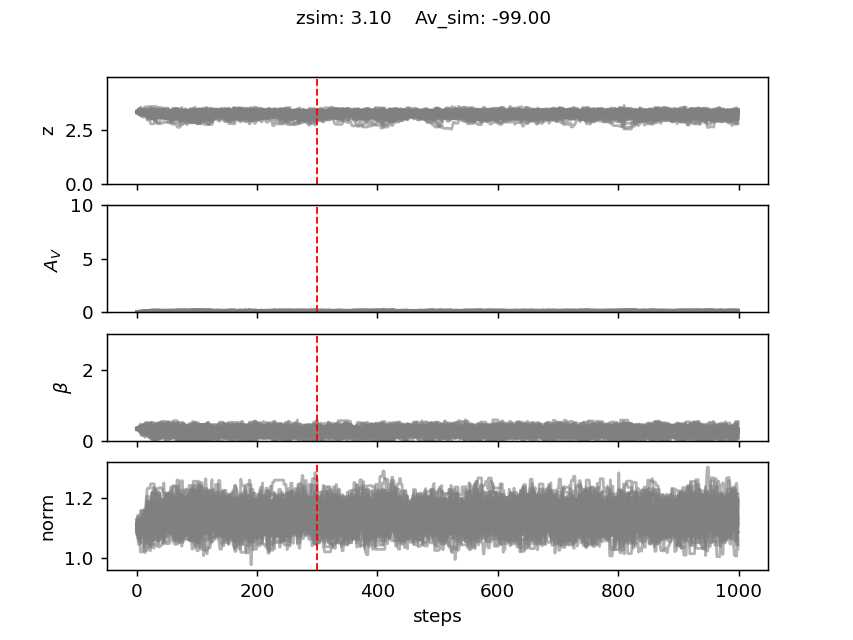

<IPython.core.display.Javascript object>


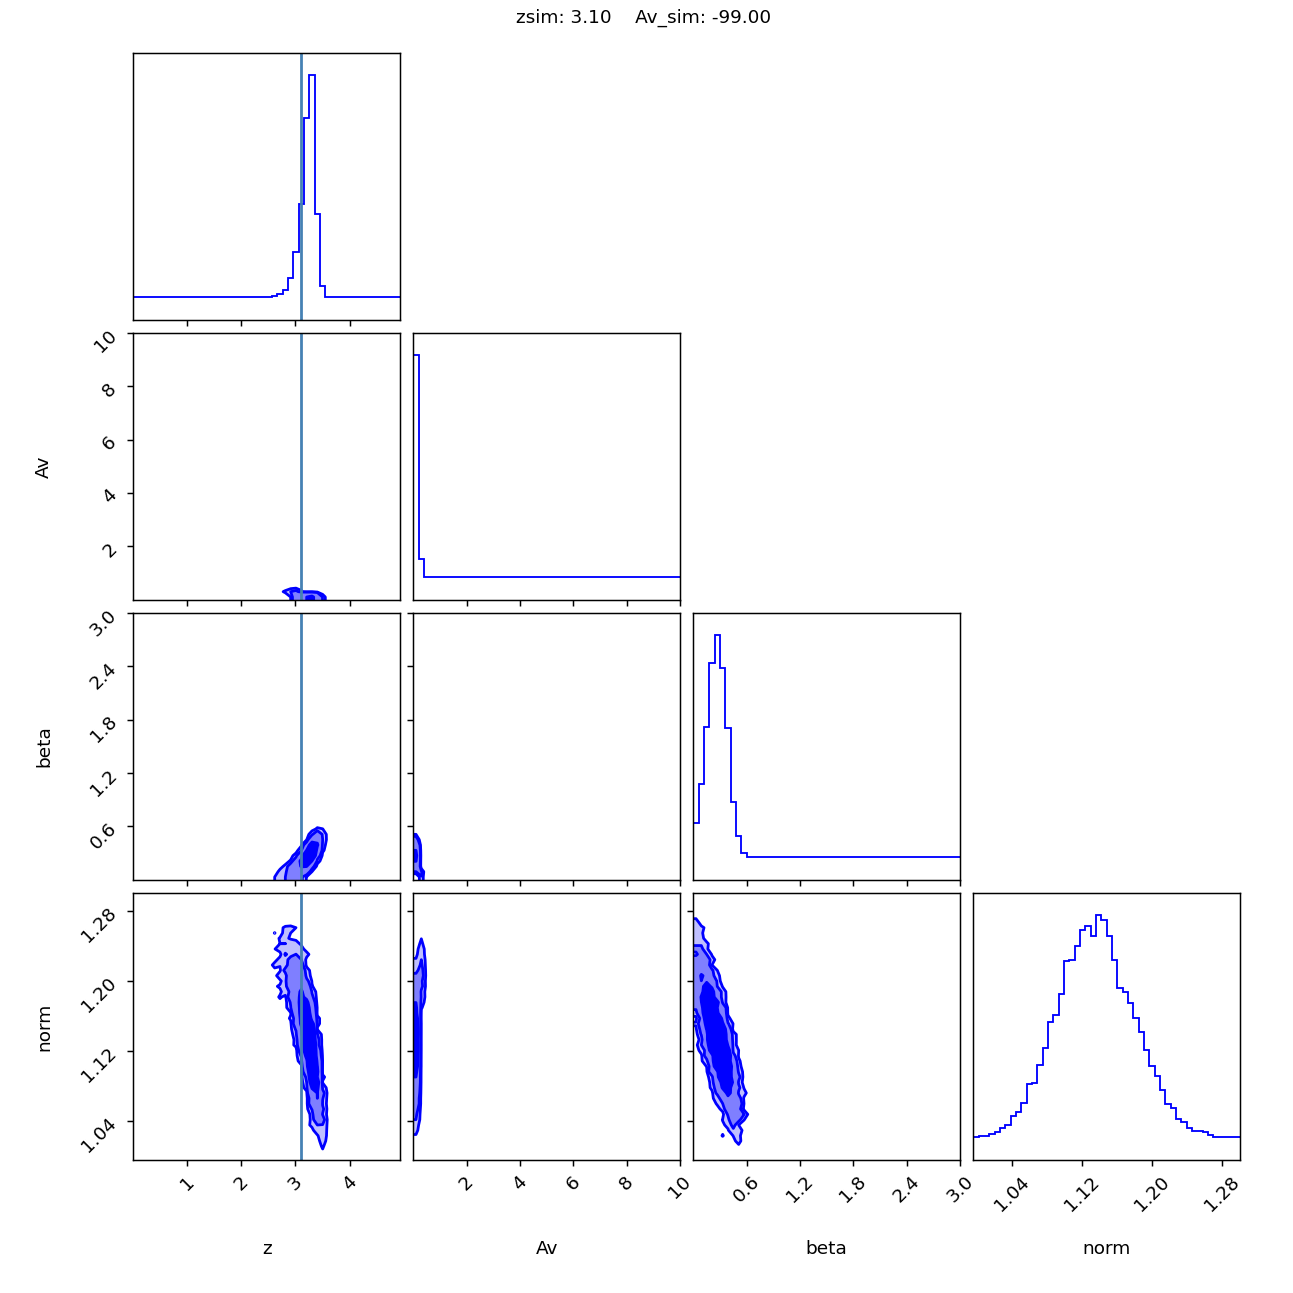


For best SED plot:
- Median values PDF: 3.249 0.122 0.264 1.135
- Best fit: 3.282 0.105 0.302 1.121


<IPython.core.display.Javascript object>


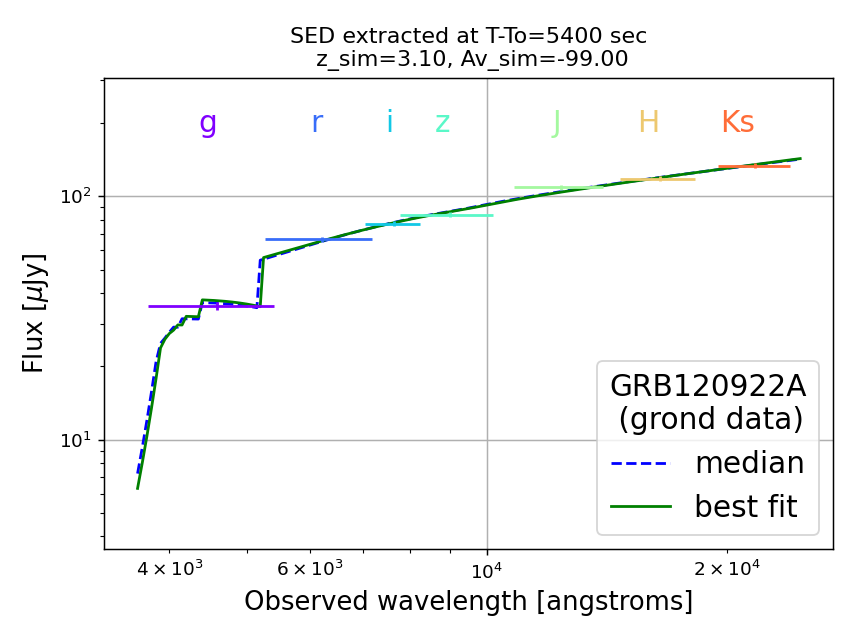


List of GRB not detected: []

None


In [9]:
photoz.fit(
    ext_law='smc',
    Nthreads=2,
    nwalkers=50,
    Nsteps1=750,
    Nsteps2=1000,
    nburn=300,
    Host_dust=True,
    Host_gas=False,
    igm_att='Meiksin',
    clean_data=False,
    priors=priors,
    adapt_z=True
)



Fit 1/2 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7960 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.74.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: 6.29   Av_lit: -99.00
Running production


100%|██████████| 1500/1500 [00:10<00:00, 146.15it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 30;
tau: [138.98259727 107.13629612 140.71085212 144.1524204 ]



Autocorrelation time: 138.98 steps


Mean acceptance fraction: 0.056

Best fit:
z: 6.597  Av: 0.000  beta: 1.450  Norm: 0.988     chi2: 5.590

Mean Proba: 9.74e-03
Sum Proba: 3.21e+02

68% - 1 sigma:
z: 6.322 +0.183 -6.042
Av: 0.318 +4.518 -0.186
Beta: 0.579 +0.531 -0.484
norm: 2.911 +1.571 -1.341

95% - 2 sigma:
z: 6.322 +0.323 -6.259
Av: 0.318 +6.456 -0.275
Beta: 0.579 +0.843 -0.565
norm: 2.911 +2.668 -1.774

99% - 3 sigma:
z: 6.322 +1.824 -6.318
Av: 0.318 +8.523 -0.315
Beta: 0.579 +1.566 -0.575
norm: 2.911 +6.444 -1.919


<IPython.core.display.Javascript object>


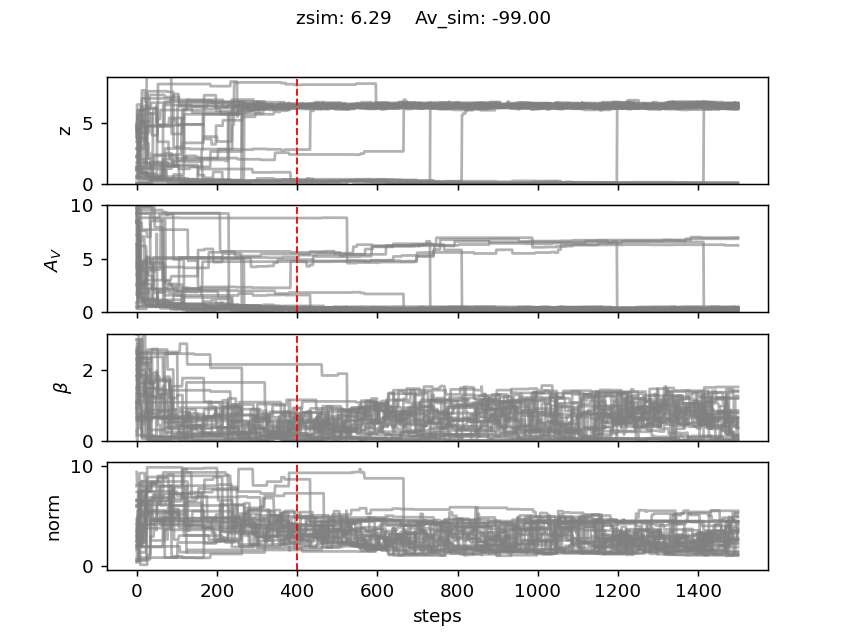

<IPython.core.display.Javascript object>


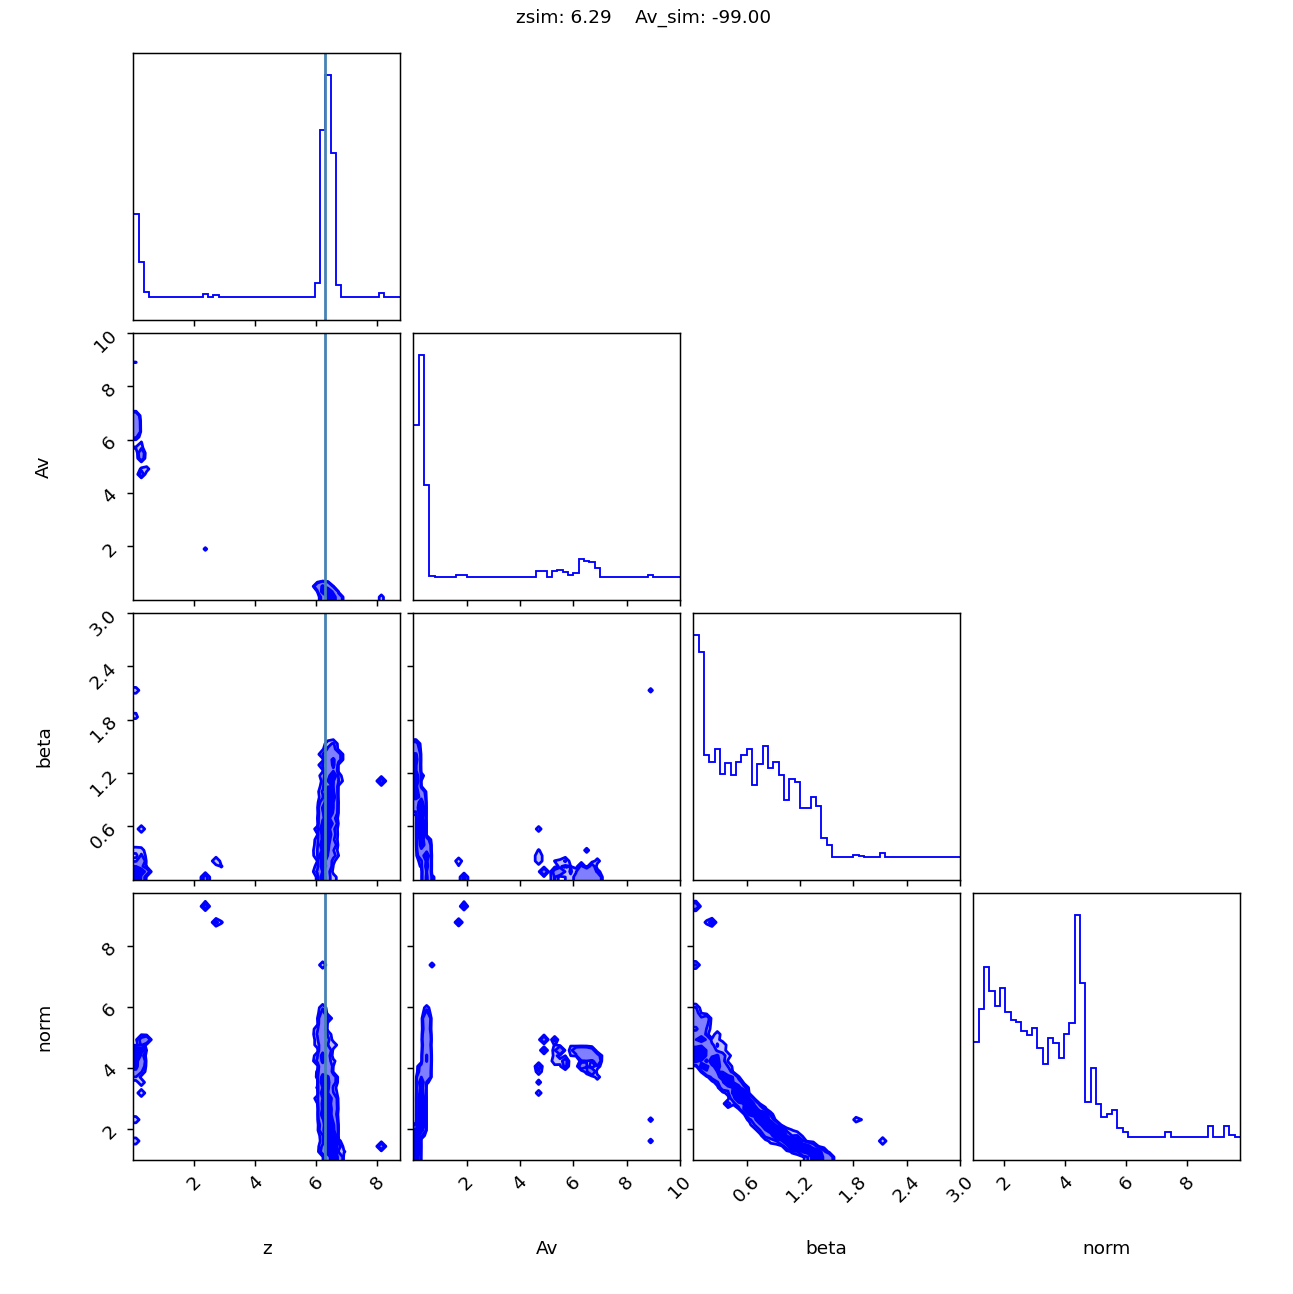


For best SED plot:
- Median values PDF: 6.322 0.318 0.579 2.911
- Best fit: 6.597 0.000 1.450 0.988


<IPython.core.display.Javascript object>


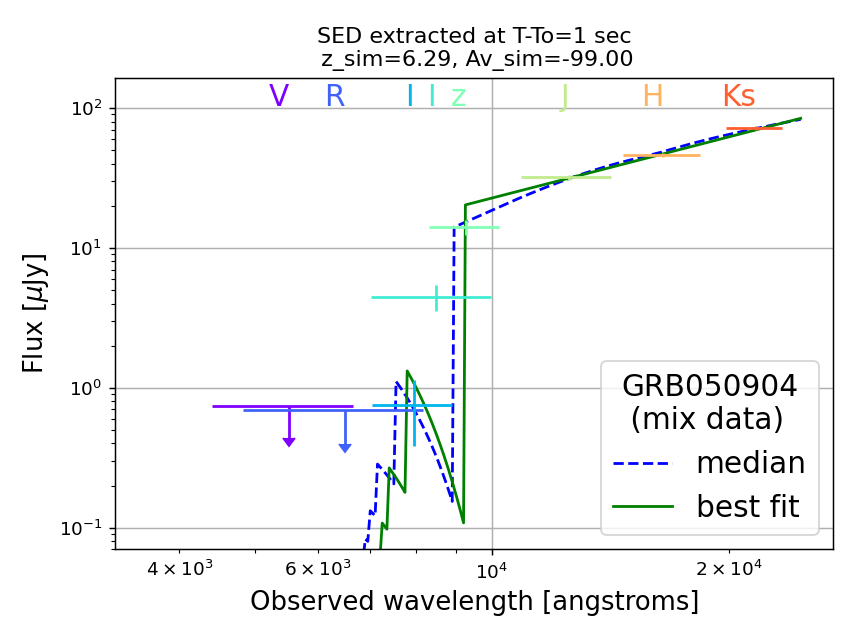



Fit 2/2 	 Object: GRB120922A 

Bluest band detection: grond/g with eff_wvl=4587 and bandwidth=1650 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 4.93.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: 3.10   Av_lit: -99.00
Running production


100%|██████████| 1500/1500 [00:08<00:00, 177.84it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 30;
tau: [149.78599919  58.11895685  73.36674584 102.49527464]



Autocorrelation time: 149.79 steps


Mean acceptance fraction: 0.181

Best fit:
z: 3.282  Av: 0.105  beta: 0.301  Norm: 1.121     chi2: 6.672

Mean Proba: 8.34e-03
Sum Proba: 2.75e+02

68% - 1 sigma:
z: 3.218 +0.119 -0.549
Av: 0.131 +0.132 -0.053
Beta: 0.245 +0.121 -0.177
norm: 1.131 +0.049 -0.041

95% - 2 sigma:
z: 3.218 +0.211 -3.189
Av: 0.131 +0.942 -0.096
Beta: 0.245 +0.232 -0.239
norm: 1.131 +0.120 -0.075

99% - 3 sigma:
z: 3.218 +0.296 -3.214
Av: 0.131 +0.979 -0.125
Beta: 0.245 +0.312 -0.244
norm: 1.131 +0.149 -0.109


<IPython.core.display.Javascript object>


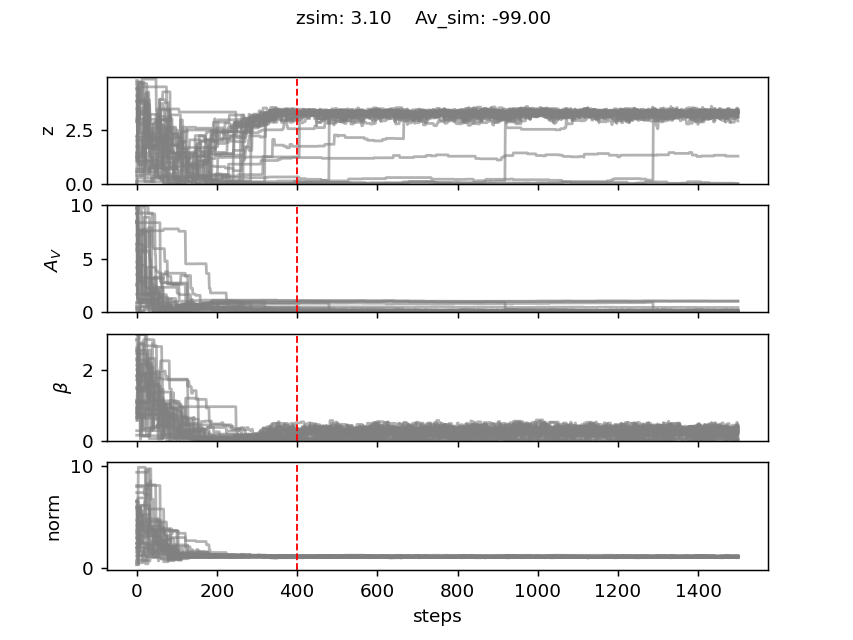

<IPython.core.display.Javascript object>


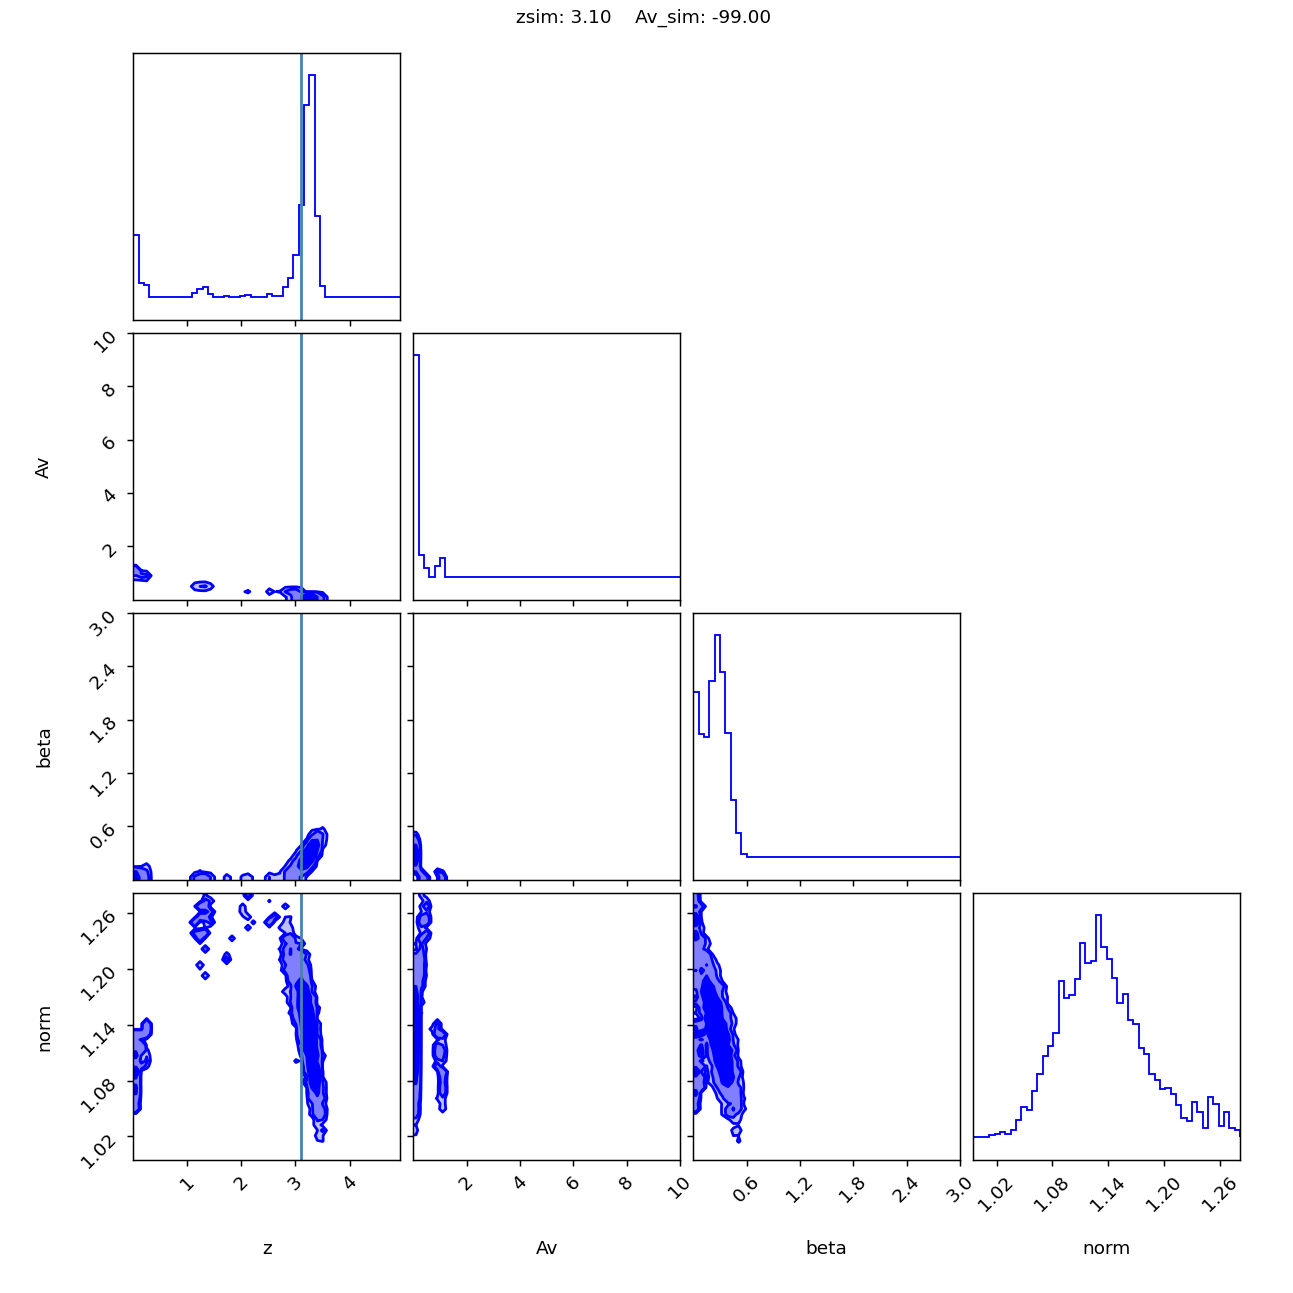


For best SED plot:
- Median values PDF: 3.218 0.131 0.245 1.131
- Best fit: 3.282 0.105 0.301 1.121


<IPython.core.display.Javascript object>


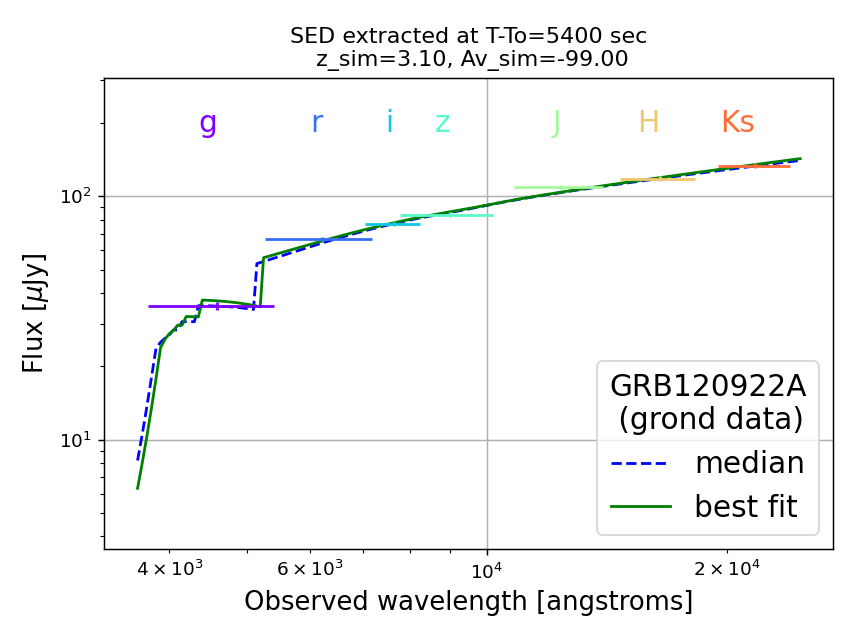


List of GRB not detected: []

None


In [10]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(
    ext_law='smc',
    Nthreads=6,
    nwalkers=30,
    Nsteps1=0,
    Nsteps2=1500,
    nburn=400,
    Host_dust=True,
    Host_gas=False,
    igm_att='Meiksin',
    clean_data=False,
    priors=priors,
    adapt_z=True
)

In [20]:
import pandas as pd

In [27]:
df1step = pd.read_csv("/home/nrakotondrainibe/Bureau/grb_git/pyGRBz/pyGRBz/results/Tuto/MultipleTargets/GRB080906/best_fits_smc.dat",delim_whitespace=True)
df2step = pd.read_csv("/home/nrakotondrainibe/Bureau/grb_git/pyGRBz/pyGRBz/results/Tuto/MultipleTargets/GRB080906/best_fits_smc (copy).dat",delim_whitespace=True)

<IPython.core.display.Javascript object>


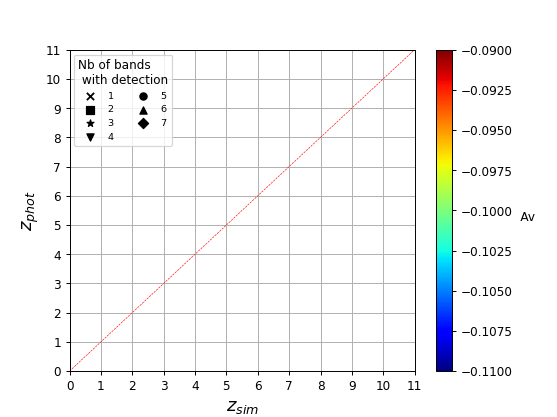

<IPython.core.display.Javascript object>


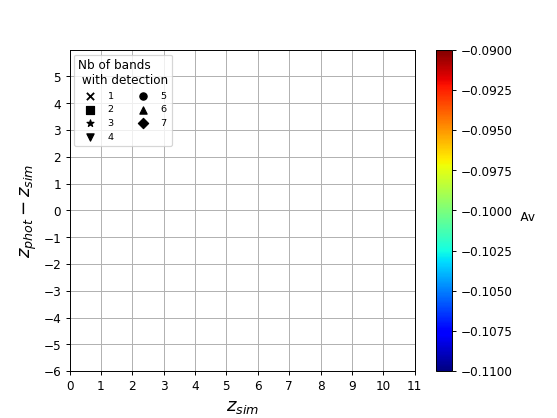

<IPython.core.display.Javascript object>


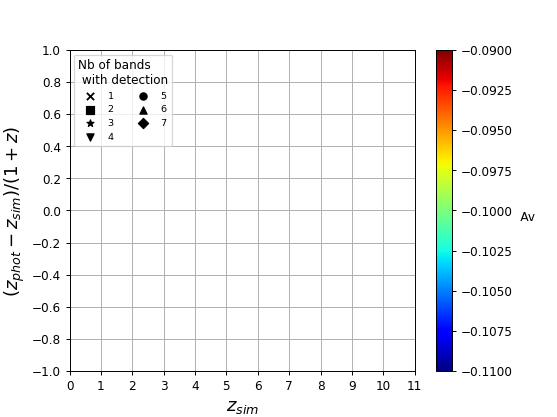

In [16]:
# Plot all redshift estimations together
photoz.plot_zsim_zphot(
    input_file='best_fits_all_smc',
    output_suffix='_smc_1sig',
    sigma=1,
    input_dir='/results/Tuto/MultipleTargets/',
    output_dir='/results/Tuto/MultipleTargets/'
)